## The Sparks Foundation - Internship
## Amit jaiwal
## Data Science And Business Analytics
## Task 3


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**2. Importing Data sets**

In [24]:
df = pd.read_csv('Samplesuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**3. Checking if Null Values are present**

In [25]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**4.Deleting unecessary Data** 

In [26]:
df = df.drop(columns=['Country','Postal Code'] , axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**5. Counting the Unique Values in Column**

In [27]:
s = df['Ship Mode'].unique()
se =df['Segment'].unique()
c = df['Category'].unique()
r = df['Region'].unique()

print(s)
print(se)
print(c)
print(r)


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['South' 'West' 'Central' 'East']


**6. Visualizing the data**

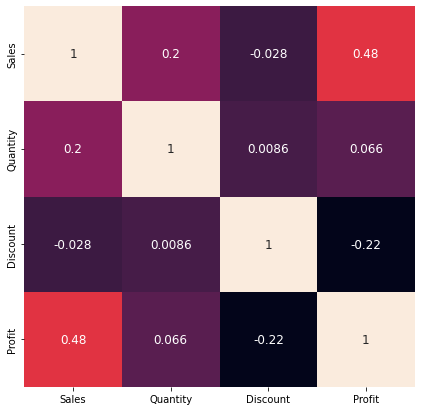

In [28]:
#Plotting correlation between variables
plt.figure(figsize=(7,7))
sns.heatmap(df.corr() , annot=True , cbar=False , annot_kws={'size' : 12})
plt.show()
# sns.pairplot(df)  //To plot individual graph

**7. Profit Analysis based on Ship Mode , Segment , Category & Region**

<AxesSubplot:title={'center':'Category'}, ylabel='Profit'>

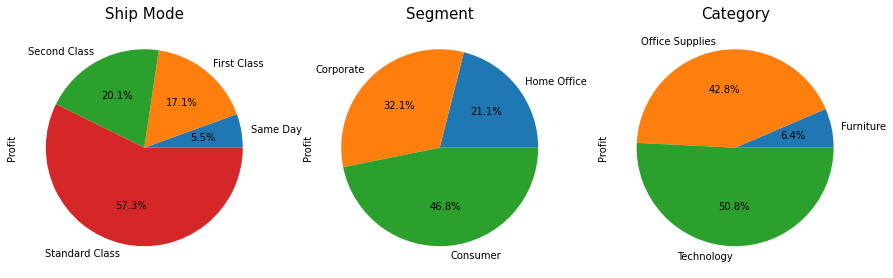

In [29]:
Ship = pd.DataFrame(df.groupby('Ship Mode').sum()).sort_values('Profit')
Segment = pd.DataFrame(df.groupby('Segment').sum()).sort_values('Profit')
Category = pd.DataFrame(df.groupby('Category').sum()).sort_values('Profit')




fig , ax = plt.subplots(1,3, figsize=(15,6))

ax[0].set_title('Ship Mode',fontsize= 15)
ax[1].set_title('Segment',fontsize= 15)
ax[2].set_title('Category',fontsize= 15)


Ship.Profit.plot.pie(autopct = '%0.1f%%' , ax=ax[0])
Segment.Profit.plot.pie( autopct='%0.1f%%' , ax=ax[1])
Category.Profit.plot.pie(autopct='%0.1f%%' , ax=ax[2])





Text(0.5, 1.0, 'Region')

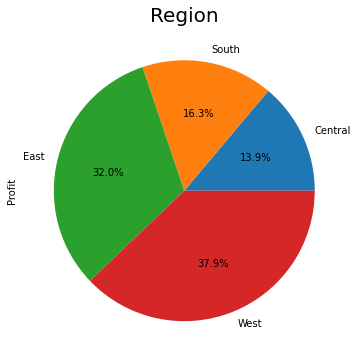

In [30]:
Region = pd.DataFrame(df.groupby('Region').sum()).sort_values('Profit')
Region.Profit.plot.pie(autopct='%0.1f%%' ,figsize=(15,6))

plt.title("Region",fontsize=20)

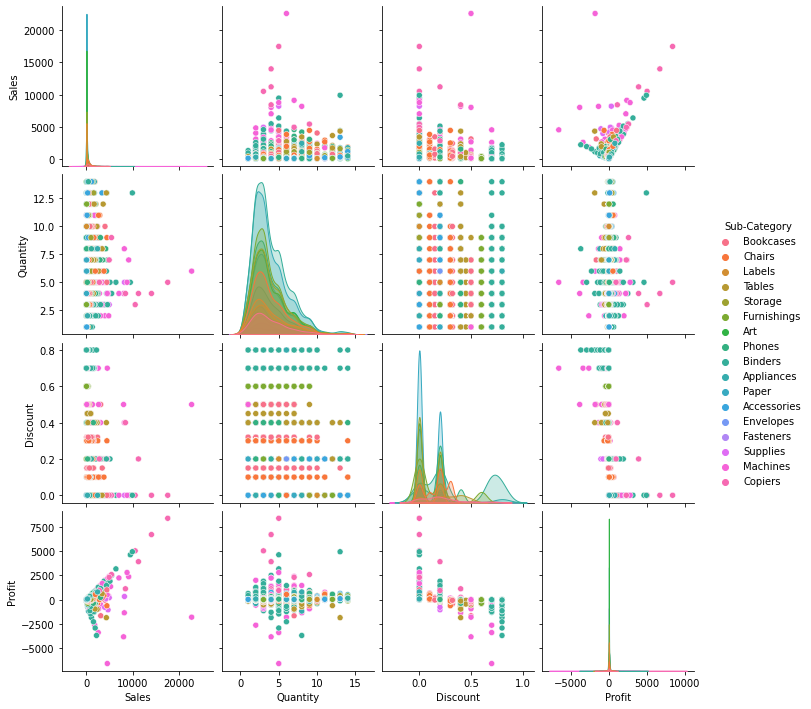

In [31]:
sns.pairplot(df,hue='Sub-Category')

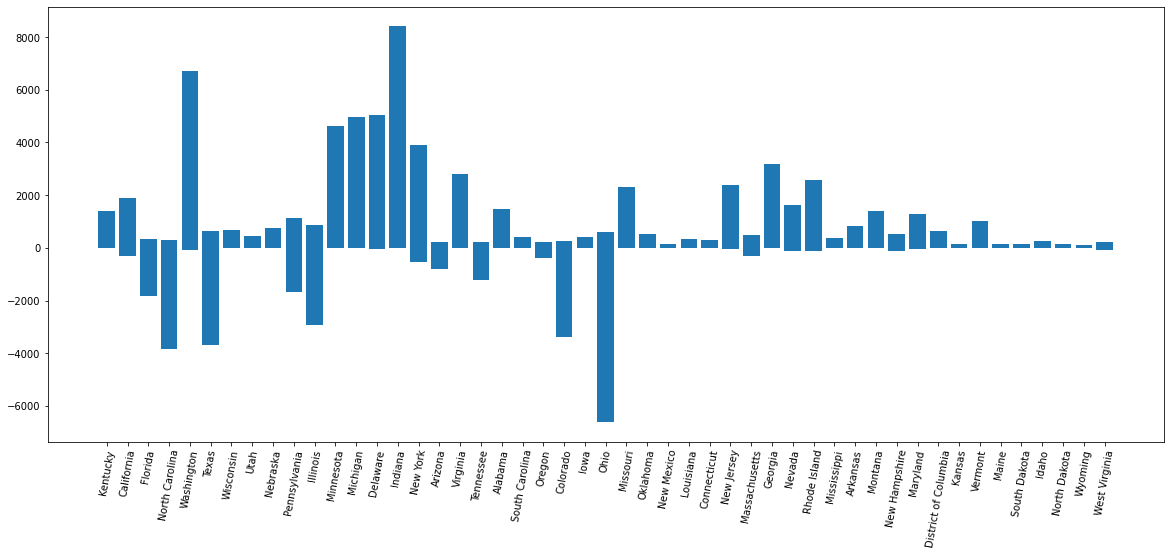

In [32]:
plt.figure(figsize=(20,8))
plt.bar(df['State'],df['Profit'])
plt.xticks(rotation=80)
plt.show()

In [33]:
grouped = pd.DataFrame(df.groupby(['Ship Mode' , 'Segment' , 'Category' , 'Sub-Category' , 'State', 'Region'])
                                          ['Quantity' , 'Discount' , 'Sales' , 'Profit' ].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


## Successfully completed task - 3
## Thank you 